
## Datasets & Dataloaders

**Pytorch provides two data primitives: `torch.util.data.DataLoader` & `torch.util.data.Dataset`** that allow you to use pre-loaded datasets as well as your own data. <br>
Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that subclass `torch.utils.data.Dataset` and implement functions specific to the particular data. They can be used to prototype and benchmark your model.You can find them here: [Image Datasets](https://docs.pytorch.org/vision/stable/datasets.html), [Text Datasets](https://docs.pytorch.org/text/stable/datasets.html), [Audio Datasets](https://docs.pytorch.org/audio/stable/datasets.html).

### Loading a Dataset

loading the [Fashion-MNIST](https://github.com/zalandoresearch/) dataset from TorchVision. 60k training examples and 10k test examples. Each example comprise a 28x28 grayscale image and an associated label from one of 10 classes.
Lables are integers in Datasets `(0-9)`.
Label Classes:  

**Load the Fashion-MNIST dataset with the following parameters:**
- `root` is the path where the train/test data is stored,
- `train` specifies training or test dataset,
- `download=True` downloads the data from the internet if it's not available at `root`,
- `transform` and `target_transform` specify the feature and lable transformations

In [33]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

# Classes of Labels 
print(training_data.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Classes of Labels from the Dataset

In [ ]:
# Looking More.

### Iterating and Visualizing the Dataset

We can index `Datasets` manually like a list: `training_data[index]`. We use `matplotlib` to visualize some samples in our training data.
`Datasets` give numerical labels.  map is somehthing we define for Readability.

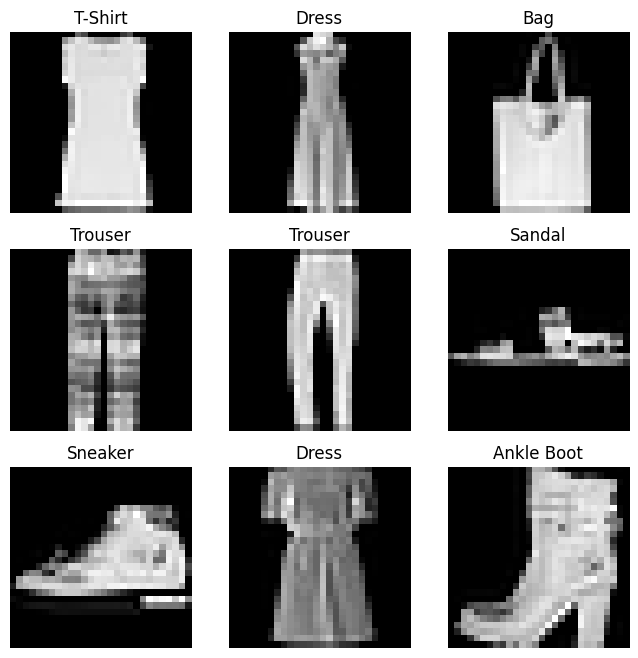

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
# plt.show()

### Creating a Custom Dataset for your files

the FashionMNIST images are stored in a directory `img_dir`, and their labels are stored separately in a CSV file `annotations_file`.

<br>

**`__getitem__`** <br><br>

The `__getitem__` function loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image’s location on disk, converts that to a tensor using decode_image, retrieves the corresponding label from the csv data in self.img_labels, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.


In [19]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    # This Function run once when instantiating the Dataset Objec.
    # initialize the directory containing the images, the annotations file, and both transform
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.img_labels = pd.read_csv(annotations_file)
        self.transform = transform
        self.target_transform = target_transform

    # The __len__ function returns the number of samples in our dataset.
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc(idx, 1)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image, label

### Preparing your data for training with DataLoaders

`DataLoader` : is an iterable, some feat's pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.`

In [23]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Iterate through the DataLoader


We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at [Samplers](https://docs.pytorch.org/docs/stable/data.html#torch.utils.data.Sampler)).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


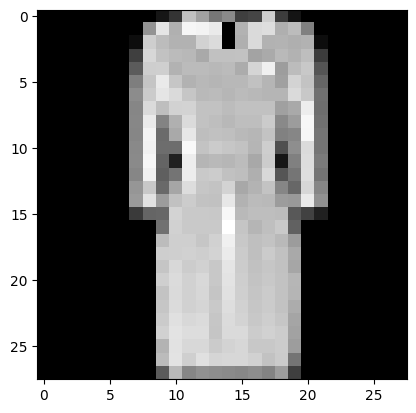

Label: 3


In [49]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
# print(f"Training Features: {train_features[0]}")
# print(f"Training Labels: {train_labels[0]}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f"Label: {label}")
# plt.axis("off")